# Ciência de Dados
## Bacharelado em Ciência da Computação / PUCPR

Professor Jean Paul Barddal

`Alex Cohen Dambrós Lopes` - `alex.lopes@pucpr.edu.br`   

`Caio Henrique Martins` - `caiohmsts@gmail.com`   

`Carlos Henrique dos Santos` - `carlos.hm25@hotmail.com`   
 
`Gabriel Scholze Rosa` - `gabrielscholze24@gmail.com`   

`Matheus Leindorf Muller` - `matheus.l.muller@gmail.com`

`Yerik Koslowski` - `yerik.koslowski@pucpr.edu.br`

`2022`

# Imports

In [2]:
import pandas as pd
import numpy as np 
import os
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from itertools import chain, combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV, train_test_split
from sklearn.feature_selection import RFECV, SelectKBest, chi2, SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, OneHotEncoder, StandardScaler, scale, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn import model_selection

np.random.seed(42)
pd.set_option('display.max_rows', None)

# Método utilizado para carregar as bases de dados

In [3]:
if not os.path.isfile('train.csv'):
    !wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

if not os.path.isfile('test.csv'):
    !wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

--2022-11-14 16:35:32--  https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wxz0qd1ngjb1z2d/train.csv [following]
--2022-11-14 16:35:32--  https://www.dropbox.com/s/raw/wxz0qd1ngjb1z2d/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68cc2863b3c2f349eda272c4d6.dl.dropboxusercontent.com/cd/0/inline/Bwv7bwThF4bcRdCgTxubu54SZ0jiZk1QADUvo8pEWclPOXMxuOMnKcox0GIm7oaZXkEjECLnK6_1H1MUmHeSPX-rJiXhxsIHoM10JeNSfxxucFbZSFOe9rJhgBDKYBJ2ZXQYAOxoiHojHHJfhi3lZQcxPeo4fSa7wlgnTKW-CYY_wg/file# [following]
--2022-11-14 16:35:34--  https://uc68cc2863b3c2f349eda272c4d6.dl.dropboxusercontent.com/cd/0/inline/Bwv7bwThF4bcRdCgTxubu54SZ0jiZk1QADUvo8pEWclPOXMxuOMnKcox0GIm7oaZXkEjECLnK6_1H1MUmHeSPX

# Abrindo as bases de treino e teste

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,HS_CPF,TEMPOCPF,DISTCENTROCIDADE,ORIENTACAO_SEXUAL,RELIGIAO,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,3144,11,3338,HETERO,EVANGELICA,166753,2,0,1,0,...,0,0,0,0,0,0,-9998,-9998,-9998,1.0
1,54431,19,5792,HETERO,CATOLICA,4820,1,1,0,0,...,0,0,0,0,0,1,-9998,-9998,-9998,0.0
2,72055,26,1550,HETERO,CATOLICA,502,1,0,2,0,...,4,2,0,0,0,0,-9998,4,-9998,0.0
3,637687,18,0,HETERO,CATOLICA,535010,2,0,0,0,...,1,7,0,1,0,0,-9998,2,7,0.0
4,586795,20,0,HETERO,CATOLICA,2528,3,0,1,0,...,0,0,0,0,0,0,-9998,15,15,0.0


# Remove as colunas de acordo com a LEI Nº 12.414 DE 09 DE JUNHO DE 2011

In [6]:
train.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
test.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)

# Transformando os valores inf e -inf para NaN

No contexto da base valores negativos não são validos, portanto os valores negativos são transformados em `NaN (Not a Number).

In [7]:
train[train < 0] = np.nan
test[test < 0] = np.nan

# Criando um dataframe de metadados das colunas
 - Nome da coluna
 - Valores mínimos e máximos
 - Porcentagem de valores nulos
 - correlação da coluna com o Target

In [8]:
target = train["TARGET"]

data = {
    "names":[],
    "min": [],
    "max": [],
    "%null": [],
    "correlation": [],
}
for (columnName, columnData) in train.iteritems():
    try:
        values = list(filter(lambda a: not np.isnan(a) ,columnData))
        data['names'].append(columnName)
        nanvalues = len(list(filter(np.isnan ,columnData)))
        data['min'].append(min(values) if len(values) > 0 else np.nan)
        data['max'].append(max(values) if len(values) > 0 else np.nan)
        data['%null'].append(round((nanvalues/len(columnData))*100, 2))
        data["correlation"].append(round(train[columnName].corr(target),2))
    except:
        continue

infoColumns = pd.DataFrame.from_dict(data)
infoColumns.sort_values('correlation',inplace=True, ascending=False)
infoColumns.to_csv("infoColumns.csv", index = False)

In [9]:
infoColumns = pd.read_csv('infoColumns.csv')

In [10]:
infoColumns

,names,min,max,%null,correlation
0,TARGET,0.0,1.0,0.00,1.00
1,BOLSAFAMILIACASA,0.0,1.0,62.08,0.06
2,ANOSULTIMADECLARACAO,1.0,17.0,65.30,0.04
3,QTDPESSOASCASA,2.0,10.0,62.08,0.04
4,BOLSAFAMILIA,0.0,1.0,1.32,0.03
5,PERCENTBOLSAFAMILIACEP,0.0,36.0,27.80,0.03
6,INDICMENORDEIDADE,0.0,1.0,62.08,0.02
7,PERCENTPOPZONAURBANA,4.0,100.0,22.48,0.02
8,PERCENTMEDIOCEP,0.0,40.0,28.14,0.01
9,ANOSULTIMARESTITUICAO,1.0,18.0,83.52,0.01


# Removendo colunas que possem alto percentual de missing

In [11]:
# Removendo colunas com mais de 50% de valores Nulos

for index, row in infoColumns.iterrows():
    try:
        if row['%null'] > 60.0:
            train.drop([row['names']], axis=1, inplace=True)
            test.drop([row['names']], axis=1, inplace=True)
    except: 
        continue

# Frequencia Acumulada

Análise de indivíduos

In [12]:
frequencia = []

def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)
        
        frequencia.append(y_value)
  
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)

In [13]:
colunas = ['TEMPOCPF',
 'DISTCENTROCIDADE',
 'DISTZONARISCO',
 'QTDENDERECO',
 'QTDEMAIL',
 'QTDCELULAR',
 'CELULARPROCON',
 'QTDFONEFIXO',
 'TELFIXOPROCON',
 'INDICEEMPREGO',
 'PORTEEMPREGADOR',
 'SOCIOEMPRESA',
 'FUNCIONARIOPUBLICO',
 'SEGMENTACAO',
 'SEGMENTACAOCOBRANCA',
 'SEGMENTACAOECOM',
 'SEGMENTACAOFIN',
 'SEGMENTACAOTELECOM',
 'IDADEMEDIACEP',
 'PERCENTMASCCEP',
 'PERCENTFEMCEP',
 'PERCENTANALFABETOCEP',
 'PERCENTPRIMARIOCEP',
 'PERCENTFUNDAMENTALCEP',
 'PERCENTMEDIOCEP',
 'PERCENTSUPERIORCEP',
 'PERCENTMESTRADOCEP',
 'PERCENTDOUTORADOCEP',
 'PERCENTBOLSAFAMILIACEP',
 'PERCENTFUNCIONARIOPUBLICOCEP',
 'MEDIARENDACEP',
 'PIBMUNICIPIO',
 'QTDUTILITARIOMUNICIPIO',
 'QTDAUTOMOVELMUNICIPIO',
 'QTDCAMINHAOMUNICIPIO',
 'QTDCAMINHONETEMUNICIPIO',
 'QTDMOTOMUNICIPIO',
 'PERCENTPOPZONAURBANA',
 'IDHMUNICIPIO',
 'ESTIMATIVARENDA',
 'QTDDECLARACAOISENTA',
 'QTDDECLARACAO10',
 'QTDDECLARACAOREST10',
 'QTDDECLARACAOPAGAR10',
 'RESTITUICAOAGENCIAALTARENDA',
 'BOLSAFAMILIA']

for index, row in train.iterrows():
    train.loc[index, 'QTD_MISSING'] = row[colunas].isna().sum()
    train.loc[index, '%MISSING'] = ((train.loc[index, 'QTD_MISSING']/len(colunas))*100).round(2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


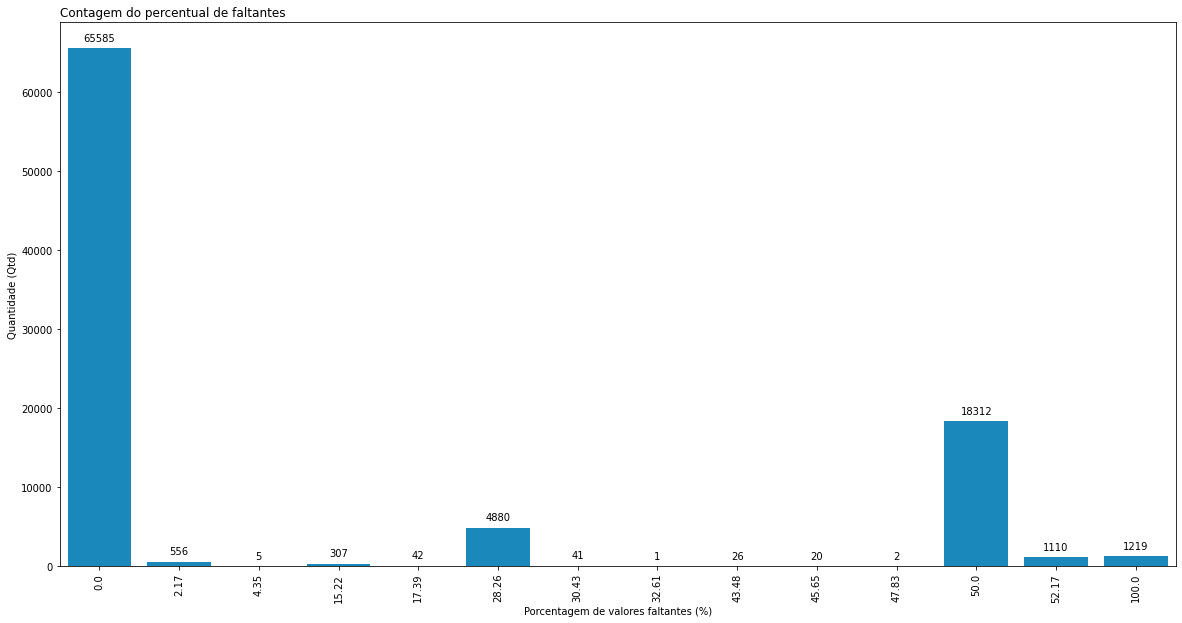

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(train["%MISSING"], color = "#0092D4", ax = ax)
fig = plt.title("Contagem do percentual de faltantes", loc="left")
fig = plt.xlabel("Porcentagem de valores faltantes (%)")
fig = plt.ylabel("Quantidade (Qtd)")
add_value_labels(ax)
frequencia.reverse()
plt.xticks(rotation = 90)
plt.show()

In [15]:
lista = train['%MISSING'].sort_values(ascending = False).unique()
df_freq_acumulada = pd.DataFrame({'%MISSING': lista, 'FREQUENCIA': frequencia})

anterior = 0
total_frequencia = sum(frequencia)

for index, row in df_freq_acumulada.iterrows():
  atual = row['FREQUENCIA']
  df_freq_acumulada.loc[index, 'FREQUENCIA_ACUMULADA'] = (anterior + atual)
  anterior = df_freq_acumulada.loc[index, 'FREQUENCIA_ACUMULADA']

  df_freq_acumulada.loc[index, '%FREQUENCIA_RELATIVA'] = ((row['FREQUENCIA'] / total_frequencia) * 100).round(2)
  df_freq_acumulada.loc[index, '%FREQUENCIA_RELATIVA_ACUMULADA'] = ((df_freq_acumulada.loc[index, 'FREQUENCIA_ACUMULADA'] / total_frequencia) * 100).round(2)
  
df_freq_acumulada

,%MISSING,FREQUENCIA,FREQUENCIA_ACUMULADA,%FREQUENCIA_RELATIVA,%FREQUENCIA_RELATIVA_ACUMULADA
0,100.00,1219,1219.0,1.32,1.32
1,52.17,1110,2329.0,1.21,2.53
2,50.00,18312,20641.0,19.88,22.41
3,47.83,2,20643.0,0.00,22.41
4,45.65,20,20663.0,0.02,22.43
5,43.48,26,20689.0,0.03,22.46
6,32.61,1,20690.0,0.00,22.46
7,30.43,41,20731.0,0.04,22.51
8,28.26,4880,25611.0,5.30,27.81
9,17.39,42,25653.0,0.05,27.85


In [16]:
# removendo 2.53 % dos dados da base que possuem um valor de missing de 52.17 ou maiores 

train.drop(train[train['%MISSING'] >= 52.17].index, inplace=True)

# removendo dados onde a quantidade for menor que 200

percentual = 2.53

for index, row in df_freq_acumulada.iterrows():
    if row['FREQUENCIA'] <= 200:
        percentual += row['%FREQUENCIA_RELATIVA']
        train.drop(train[train['%MISSING'] == row['%MISSING']].index, inplace=True)

print("percentual total apagado da base: ", round(percentual, 2))

percentual total apagado da base:  2.68


In [17]:
train.drop(['QTD_MISSING', '%MISSING'], axis = 1, inplace = True)

In [18]:
test.fillna(test.median(), inplace = True)

# Transformando variáveris numéricas que possuem comportamento discreto

In [19]:
vars_discretas = ['SEGMENTACAOECOM', 'SEGMENTACAO', 'SOCIOEMPRESA', 'FUNCIONARIOPUBLICOCASA', 'SEGMENTACAOFIN', 'TELFIXOPROCON',
                  'SEGMENTACAOFINBAIXACASA', 'SEGMENTACAOCOBRANCA', 'SEGMENTACAOTELECOM', 'COBRANCAALTACASA', 
                  'CELULARPROCON', 'RESTITUICAOAGENCIAALTARENDA', 'COBRANCABAIXOCASA', 'SEGMENTACAOALTACASA',
                  'SEGMENTACAOFINMEDIACASA', 'COBRANCAMEDIOCASA', 'INDICMENORDEIDADE', 'BOLSAFAMILIA', 
                  'FUNCIONARIOPUBLICO', 'BOLSAFAMILIACASA', 'INDICEEMPREGO' ]

for coluna in vars_discretas: 
    try: 
        train[coluna] = train[coluna].astype(str)
        test[coluna] = test[coluna].astype(str)
    except:
        continue

# Variable Inflation Factor (VIF)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Função utilizada para calcular o VIF
def calc_vif(df_x):
  df_x = add_constant(df_x)
  vif = pd.DataFrame()
  vif["variables"] = df_x.columns
  vif["VIF"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
  vif["Correlation"] = [abs(round(df_x[i].corr(df_x["TARGET"])*100,2)) for i in df_x.columns]
  return vif

In [21]:
# Substituindo valores nulos pela média de cada coluna e filtrando apenas var numéricas
trainViF = train.fillna(train.median())
numerical_columns = trainViF.select_dtypes(include=['Int64', 'int32', 'float32', 'float64']).columns
trainViF = trainViF[numerical_columns]
trainViF.head()

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,QTDFONEFIXO,PORTEEMPREGADOR,IDADEMEDIACEP,PERCENTMASCCEP,...,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,IDHMUNICIPIO,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,TARGET
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,49.0,41.0,...,81.0,323.0,96.0,75.0,900.0,0.0,0.0,0.0,0.0,1.0
1,19.0,5792.0,4820.0,1.0,1.0,0.0,2.0,0.0,40.0,43.0,...,52.0,200.0,91.0,72.0,400.0,0.0,0.0,0.0,0.0,0.0
2,26.0,1550.0,502.0,1.0,0.0,2.0,1.0,2.0,46.0,48.0,...,81.0,254.0,90.0,79.0,2400.0,4.0,2.0,0.0,0.0,0.0
3,18.0,0.0,535010.0,2.0,0.0,0.0,2.0,0.0,46.0,49.0,...,72.0,254.0,94.0,73.0,25000.0,1.0,7.0,0.0,1.0,0.0
4,20.0,0.0,2528.0,3.0,0.0,1.0,3.0,0.0,47.0,48.0,...,49.0,147.0,95.0,74.0,1900.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dataframe_vif = calc_vif(trainViF).sort_values('VIF', ascending=False)
dataframe_vif.drop([0], axis = 0, inplace = True)
dataframe_vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF,Correlation
29,IDHMUNICIPIO,8.998465,0.02
11,PERCENTFEMCEP,7.794617,0.29
10,PERCENTMASCCEP,7.722575,0.36
26,QTDCAMINHONETEMUNICIPIO,7.435346,1.32
24,QTDAUTOMOVELMUNICIPIO,7.088750,0.92
32,QTDDECLARACAO10,4.589035,7.32
23,QTDUTILITARIOMUNICIPIO,3.898720,1.49
25,QTDCAMINHAOMUNICIPIO,3.875918,2.63
19,PERCENTBOLSAFAMILIACEP,3.268807,1.75
21,MEDIARENDACEP,3.167635,3.18


# Outliers

In [23]:
# lista com os outliers
outliers = []

# loop para processar cada coluna
for col in train.select_dtypes(include = "number").columns.values:

    # calculando os quartis
    q1 = train[col].quantile(q=0.25)
    q3 = train[col].quantile(q=0.75)

    # calcular o IQR 
    iqr = q3 - q1 

    # Calculando os Whiskers 
    whisker_sup = q3 + 1.5 * iqr
    whisker_inf = q1 - 1.5 * iqr

    # selecionando os outliers da coluna
    mask = (train[col] > whisker_sup) | (train[col] < whisker_inf) 
    outliers_col = list(train[mask].index)

    print(f'{col} tem os outliers: {outliers_col}')

    # adicionando todos os indices na lista global de outliers 
    outliers.extend(outliers_col)

# contando quantas vezes cada instancia foi marcada
from collections import Counter
contagem = Counter(outliers)
print('\n Contagem das instancias que mais foram marcadas: \n', contagem.most_common(10))

TEMPOCPF tem os outliers: []
DISTCENTROCIDADE tem os outliers: [27, 62, 77, 79, 105, 110, 143, 229, 293, 453, 470, 471, 479, 553, 565, 615, 621, 672, 688, 715, 721, 771, 774, 838, 862, 871, 911, 934, 967, 1002, 1006, 1018, 1051, 1061, 1064, 1113, 1167, 1179, 1187, 1194, 1207, 1272, 1304, 1311, 1317, 1356, 1361, 1416, 1439, 1463, 1466, 1480, 1539, 1549, 1607, 1608, 1644, 1674, 1697, 1704, 1705, 1714, 1735, 1825, 1837, 1892, 1925, 2004, 2062, 2078, 2102, 2103, 2105, 2160, 2165, 2242, 2270, 2280, 2326, 2366, 2466, 2467, 2470, 2498, 2550, 2566, 2596, 2610, 2665, 2683, 2686, 2687, 2705, 2741, 2758, 2788, 2840, 2886, 2896, 2941, 2997, 3012, 3036, 3048, 3108, 3158, 3210, 3234, 3269, 3273, 3275, 3320, 3336, 3359, 3382, 3414, 3437, 3448, 3450, 3547, 3555, 3605, 3619, 3629, 3667, 3704, 3711, 3793, 3848, 3854, 3893, 3895, 3904, 3915, 3939, 3944, 3958, 4031, 4051, 4068, 4090, 4179, 4208, 4259, 4316, 4317, 4363, 4419, 4429, 4435, 4462, 4463, 4471, 4531, 4550, 4638, 4709, 4720, 4728, 4755, 4776, 481

In [24]:
# Contagem de frequencia
freq = Counter(elem[1] for elem in contagem.most_common())
freq

Counter({13: 1,
         12: 5,
         11: 17,
         10: 60,
         9: 207,
         8: 497,
         7: 1161,
         6: 2376,
         5: 4441,
         4: 7232,
         3: 10289,
         2: 15118,
         1: 22681})

In [25]:
total = 0

for key, value in freq.items():
    porcentagem = (value / len(train))*100
    print(f"{value} instância(s) que possuem {key} coluna(s) de Outliers -> {round(porcentagem, 2)}% da base")

    if key >= 7:
        total += porcentagem

print(f"\nO total que será retirado será: {round(total, 2)}% da base atual!")

1 instância(s) que possuem 13 coluna(s) de Outliers -> 0.0% da base
5 instância(s) que possuem 12 coluna(s) de Outliers -> 0.01% da base
17 instância(s) que possuem 11 coluna(s) de Outliers -> 0.02% da base
60 instância(s) que possuem 10 coluna(s) de Outliers -> 0.07% da base
207 instância(s) que possuem 9 coluna(s) de Outliers -> 0.23% da base
497 instância(s) que possuem 8 coluna(s) de Outliers -> 0.55% da base
1161 instância(s) que possuem 7 coluna(s) de Outliers -> 1.3% da base
2376 instância(s) que possuem 6 coluna(s) de Outliers -> 2.65% da base
4441 instância(s) que possuem 5 coluna(s) de Outliers -> 4.95% da base
7232 instância(s) que possuem 4 coluna(s) de Outliers -> 8.07% da base
10289 instância(s) que possuem 3 coluna(s) de Outliers -> 11.48% da base
15118 instância(s) que possuem 2 coluna(s) de Outliers -> 16.87% da base
22681 instância(s) que possuem 1 coluna(s) de Outliers -> 25.3% da base

O total que será retirado será: 2.17% da base atual!


In [26]:
# removendo instancias que possuem outliers com uma contagem de colunas maior que 7!!!
for instancia in contagem.most_common():
    if instancia[1] in range(7, 16):
        train.drop(instancia[0], axis = 0, inplace = True)        

# Colunas removidas

Após realizar a seleção de recursos e o Feature importance, testamos e verificamos que a removoção dessas variáveis melhora o resultado.

In [27]:
colunas_removidas = ['RESTITUICAOAGENCIAALTARENDA','CELULARPROCON','TELFIXOPROCON','PERCENTDOUTORADOCEP','PERCENTMESTRADOCEP','FUNCIONARIOPUBLICO','QTDDECLARACAOPAGAR10','BOLSAFAMILIA','PERCENTANALFABETOCEP','SEGMENTACAOCOBRANCA','SOCIOEMPRESA']

# Função de pre-processamento usando OneHotEncoder

In [28]:
def pre_processamento_onehotencoder(df_encoder):
  
    try: 
        X = df_encoder.drop(['TARGET'], axis = 1)
    except:
        X = df_encoder.copy()
 
    numerical_columns = X.select_dtypes(include=['Int64', 'int32', 'float32', 'float64']).columns
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns
    nan_columns = [i[0] for i in list(X[numerical_columns].isna().all().items()) if i[1]]

    remove_columns = colunas_removidas + nan_columns
    
    numerical_columns = list(set(numerical_columns)-set(remove_columns))
    categorical_columns = list(set(categorical_columns)-set(remove_columns))

    # Features do dataset
    features = list(numerical_columns) + list(categorical_columns)
    
    numeric_imputer_transformer = Pipeline(steps=[
        ('Median Imputer', SimpleImputer(strategy='median', add_indicator=False)),
        ('Standard Scaler', StandardScaler())
    ])

    categorical_modeimputer_transformer = Pipeline(steps=[
        ('ModeImputer', SimpleImputer(strategy='constant', fill_value = 'Missing')),
        ('OneHotEncoder', OneHotEncoder(sparse=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
        ('Numerical - MeanImputer StandardScaler', numeric_imputer_transformer, numerical_columns),
        ('Categorical - ModeImputer OneHotEncoder', categorical_modeimputer_transformer, categorical_columns),
        ('AllNAN - Drop', 'drop', nan_columns)
    ])

    features_update = features.copy()
    return preprocessor.fit(df_encoder[features_update])

# Separando em X e y

In [29]:
train.drop(colunas_removidas, axis = 1, inplace = True)
test.drop(colunas_removidas, axis = 1, inplace = True)

X, y = train.drop(['TARGET'], axis = 1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 42)

preprocessor = pre_processamento_onehotencoder(train)
preprocessor_test = pre_processamento_onehotencoder(test)

# Seleção de Recursos

In [30]:
skb = SelectKBest(k='all').fit(X.fillna(X.median()), y)

In [31]:
importancias = pd.Series(skb.scores_, index=X.columns.values)

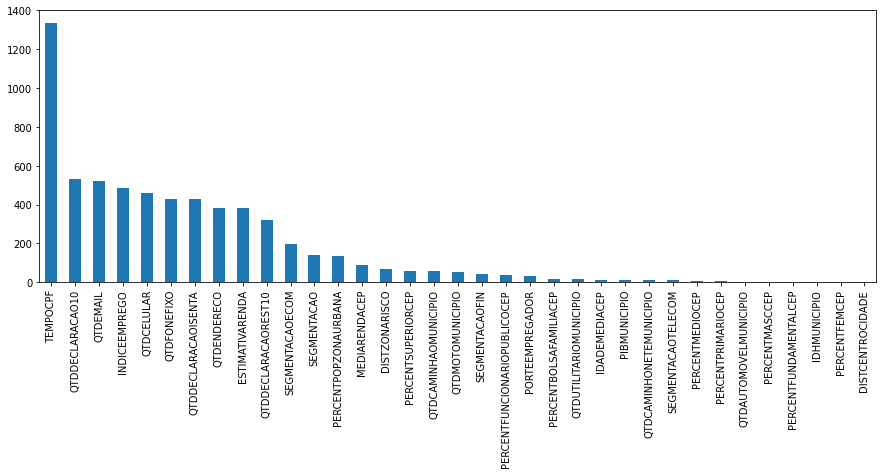

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
importancias.sort_values(ascending = False).plot(kind='bar', ax = ax)
plt.show()

# Feature Importance

In [33]:
# Criar o LeaveOneOut
loo = LeaveOneOut()

# Criando o DT
dt = DecisionTreeClassifier(random_state = 42)

# Criando o RFC
rfc = RandomForestClassifier(random_state = 42)

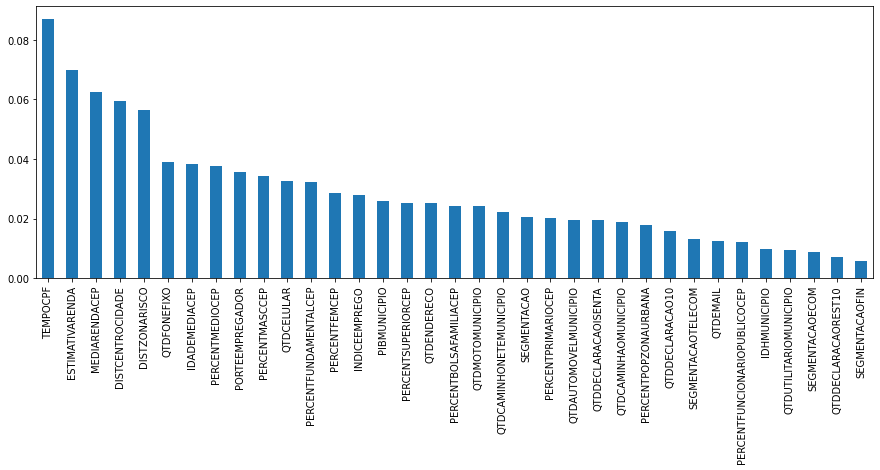

In [34]:
dt.fit(X.fillna(X.median()), y)
importancias = pd.Series(dt.feature_importances_, 
                         index = X.columns.values)

fig, ax = plt.subplots(figsize=(15, 5))
ax = importancias.sort_values(ascending = False).plot(kind='bar')
plt.show()

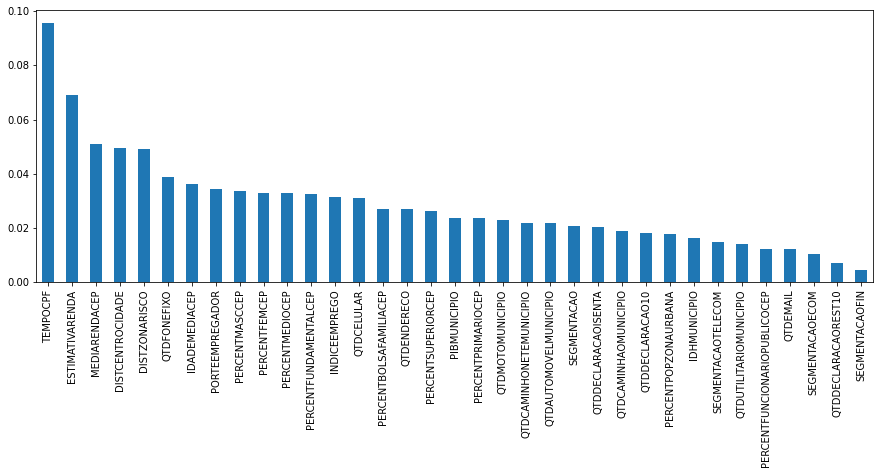

In [35]:
rfc.fit(X.fillna(X.median()), y)
importancias = pd.Series(rfc.feature_importances_, 
                         index=X.columns.values)

fig, ax = plt.subplots(figsize=(15, 5))
ax = importancias.sort_values(ascending = False).plot(kind='bar')
plt.show()

# PCA

In [36]:
# apply PCA
pca = PCA(n_components=5)
pca.fit_transform(X.fillna(X.median()))

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = X.columns.tolist())
loadings

[9.87696023e-01 1.00384467e-02 1.14345342e-03 1.07750675e-03
 4.38005753e-05]
[37712384.54089889  3801942.98257064  1283162.26390522  1245610.73074411
   251137.89410643]


,PC1,PC2,PC3,PC4,PC5
TEMPOCPF,5.366581e-06,2.156150e-05,5.821706e-04,3.195222e-04,6.754554e-04
DISTCENTROCIDADE,-5.619049e-03,2.546003e-02,-2.998847e-01,9.534947e-01,1.513941e-02
DISTZONARISCO,9.998083e-01,1.879356e-02,-3.356620e-03,4.331690e-03,2.145872e-04
QTDENDERECO,1.039448e-06,6.240413e-06,4.401567e-05,3.918799e-05,1.243667e-04
QTDEMAIL,7.792896e-08,2.932715e-06,3.045693e-05,1.456762e-05,8.925474e-05
QTDCELULAR,3.387645e-07,-8.439578e-07,3.992762e-05,3.125632e-05,5.358048e-05
QTDFONEFIXO,3.938668e-08,1.165700e-05,7.223701e-05,5.067877e-05,2.170974e-04
INDICEEMPREGO,6.929362e-07,7.450800e-06,5.791078e-05,2.821214e-05,2.599583e-06
PORTEEMPREGADOR,-2.552727e-07,8.844853e-06,-1.152161e-05,4.694658e-07,-6.391071e-05
SEGMENTACAO,-2.329469e-07,4.128121e-07,9.872319e-06,1.264175e-05,5.812129e-05


# Amostra da Base

In [37]:
# amostra
df_amostra = train.sample(1000)
df_amostra.fillna(df_amostra.median(), inplace = True)

# t-SNE

In [38]:
X_tsne, y_tsne = df_amostra.drop('TARGET', axis=1), df_amostra['TARGET']

In [39]:
tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(X_tsne)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


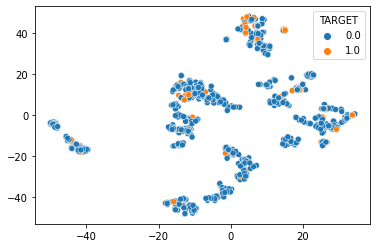

In [40]:
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=y_tsne)

# KS

In [41]:
from scipy import stats

def computeKS(y_test, y_pred_proba):
    """
    Description:
    Kolmogorov-Smirnov value obtained from ground-truth 
    targets (y_true) and
    their probabilities (y_prob_positive).
    Params:
    y_true (pd.Series): Ground-truth labels
    y_prob_positive (pd.Series): The probabilities of 
    TARGET=1
    Output:
    ks (float): The KS rate
    """
    vals = list(zip(y_test, y_pred_proba))
    positives = []
    negatives = []
    for a, b in vals:
        if a == 0:
            negatives.append(b)
        else:
            positives.append(b)
            
    ks = 100.0 * stats.ks_2samp(positives, negatives)[0]
    return ks

# Testando algoritmos

Rodar algoritmos de classificação e selecionar o algoritmo que apresentar a melhor métrica. Alguns algortimos tiveram o mesmo resulto, para desempatar escolhemos aquele que apresentava o maior ks!

In [42]:
# LogisticRegression

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=5000, random_state = 42)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 82.58
Recall: 90.87
Acurácia: 90.87
F1: 86.53
KS: 26.43


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# k-Nearest Neighbors

clf = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=3)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 83.90
Recall: 88.80
Acurácia: 88.80
F1: 86.03
KS: 5.38


In [44]:
# Decision Tree Classifier

clf = make_pipeline(preprocessor, DecisionTreeClassifier(random_state = 42)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 83.67
Recall: 84.44
Acurácia: 84.44
F1: 84.05
KS: 12.71


In [45]:
# Random Forest Classifier

clf = make_pipeline(preprocessor, RandomForestClassifier(random_state = 42)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 84.16
Recall: 90.59
Acurácia: 90.59
F1: 86.52
KS: 20.16


In [46]:
# GaussianNB

clf = make_pipeline(preprocessor, GaussianNB()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 89.15
Recall: 17.20
Acurácia: 17.20
F1: 16.82
KS: 24.24


In [47]:
# BaggingClassifier

clf = make_pipeline(preprocessor, BaggingClassifier(base_estimator = LogisticRegression(max_iter=5000, random_state = 42), n_estimators=10, random_state=42)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 82.58
Recall: 90.87
Acurácia: 90.87
F1: 86.53
KS: 26.20


In [48]:
# MLPClassifier

clf = make_pipeline(preprocessor, MLPClassifier(random_state=42, max_iter=500)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 84.06
Recall: 89.86
Acurácia: 89.86
F1: 86.39
KS: 20.62


In [49]:
# AdaBoostClassifier
clf = make_pipeline(preprocessor, AdaBoostClassifier(n_estimators=100, random_state=42)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))


Precision: 82.58
Recall: 90.85
Acurácia: 90.85
F1: 86.51
KS: 26.71


In [50]:
# XGBClassifier
best_model = make_pipeline(preprocessor, xgb.XGBClassifier(objective="binary:logistic", random_state=42)).fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Precision
print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
# Recall
print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
# Acurácia
print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
# F1
print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
# KS
print("KS: %.2f" % (computeKS(y_test, best_model.predict_proba(X_test)[:,1])))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 82.58
Recall: 90.87
Acurácia: 90.87
F1: 86.53
KS: 27.98


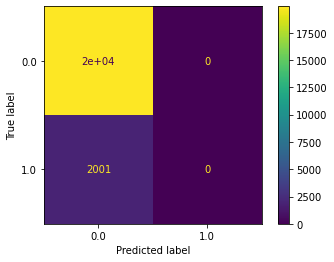

In [51]:
cm = confusion_matrix(y_test, y_pred)
plot = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
plot.plot()

# Balanceamento

In [52]:
(100 * train['TARGET'].value_counts() / len(train)).round(2) # porcentagem de pagadores adimplente e não adimplente

0.0    90.87
1.0     9.13
Name: TARGET, dtype: float64

In [53]:
y_train.value_counts()

0.0    59764
1.0     6005
Name: TARGET, dtype: int64

### OBS: O balanceamento só pode ser realizado utilizando todas as variaveis como numéricas, se realizar a conversão para discreta ao rodar o algoritmo retorna um erro de memória!


Ao roda o algoritmo usando todas as variáveis como numéricas, obtemos o seguinte resultados: 

RandomOversampler

- Precision: 87.46
- Recall: 60.27
- Acurácia: 60.27
- F1: 68.63
- KS: 27.61
- 0.0    59764
- 1.0    59764

SMOTE falhou!

RandomUnderSampler

- Precision: 87.35
- Recall: 59.22
- Acurácia: 59.22
- F1: 67.76
- KS: 26.48
- 0.0    6005
- 1.0    6005

NM1 falhou!

NM2 falhou!

NM3 falhou!


In [54]:
tecnicas = {'RandomOversampler': RandomOverSampler(),
            'SMOTE': SMOTE(),
            'RandomUnderSampler': RandomUnderSampler(),
            'NM1': NearMiss(version=1),
            'NM2': NearMiss(version=2),
            'NM3': NearMiss(version=3)}    

In [55]:
for nome, sampler in tecnicas.items():
    try:
        # aplicando a tecnica nos dados de TREINAMENTO
        X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)

        preprocessor = pre_processamento_onehotencoder(train)
        clf = make_pipeline(preprocessor, xgb.XGBClassifier(objective="binary:logistic", random_state=42)).fit(X_sampled, y_sampled)
        y_pred = clf.predict(X_test)

        print(f"\n{nome}")

        # Precision
        print("\nPrecision: %.2f" % (metrics.precision_score(y_test, y_pred, average='weighted') * 100))
        # Recall
        print("Recall: %.2f" % (metrics.recall_score(y_test, y_pred, average='weighted') * 100))
        # Acurácia
        print("Acurácia: %.2f" % (metrics.accuracy_score(y_test, y_pred) * 100))
        # F1
        print("F1: %.2f" % (metrics.f1_score(y_test, y_pred, average='weighted') * 100))
        # KS
        print("KS: %.2f" % (computeKS(y_test, clf.predict_proba(X_test)[:,1])))

        print(y_sampled.value_counts())
    except:
        print(f'\n{nome} falhou!')
        continue


RandomOversampler

Precision: 87.46
Recall: 60.27
Acurácia: 60.27
F1: 68.63
KS: 27.61
0.0    59764
1.0    59764
Name: TARGET, dtype: int64

SMOTE falhou!

RandomUnderSampler

Precision: 87.35
Recall: 59.22
Acurácia: 59.22
F1: 67.76
KS: 26.48
0.0    6005
1.0    6005
Name: TARGET, dtype: int64

NM1 falhou!

NM2 falhou!

NM3 falhou!


# Prevendo a base de teste

In [56]:
# Calculando para cada instância de teste a probabilidade de cada classe
predicted_proba = best_model.predict_proba(test)[:,1]
 
# Exemplo abaixo mostrando para a primeira instância de teste a probabilidade de cada classe
print("Probabilidade de cada classe para a primeira instância: ", predicted_proba)

Probabilidade de cada classe para a primeira instância:  [0.06742312 0.06479865 0.17295179 ... 0.10112059 0.17295179 0.04752966]


In [57]:
len(test) == predicted_proba.shape[0]

True

In [58]:
saida = pd.DataFrame(data = {"GRUPO7": predicted_proba})

In [59]:
saida.head()

,GRUPO7
0,0.067423
1,0.064799
2,0.172952
3,0.112067
4,0.192695


In [60]:
saida.to_csv("GRUPO7.csv", sep=',', index = False)